<a href="https://colab.research.google.com/github/azimjaan21/loan_status_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Status Prediction**



---



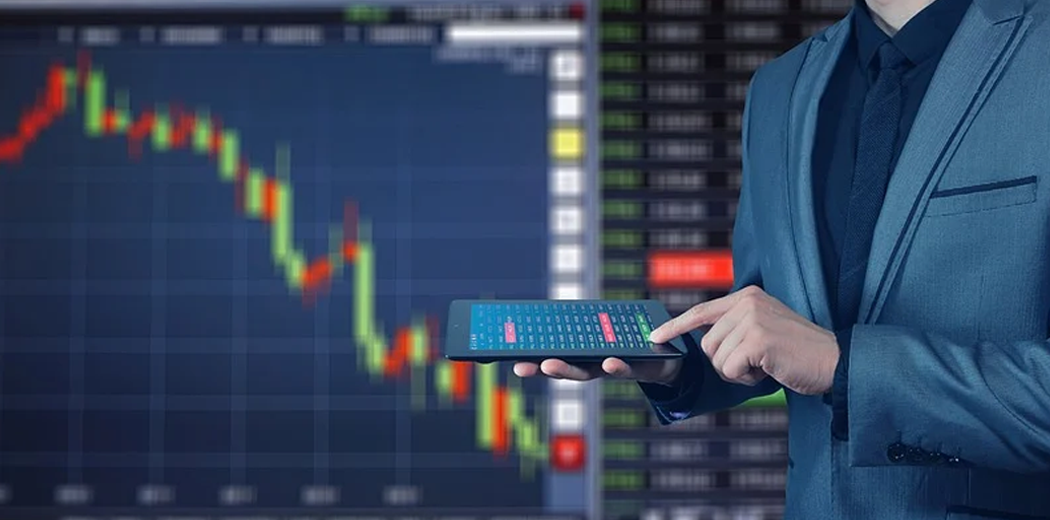




---



**Work Flow**

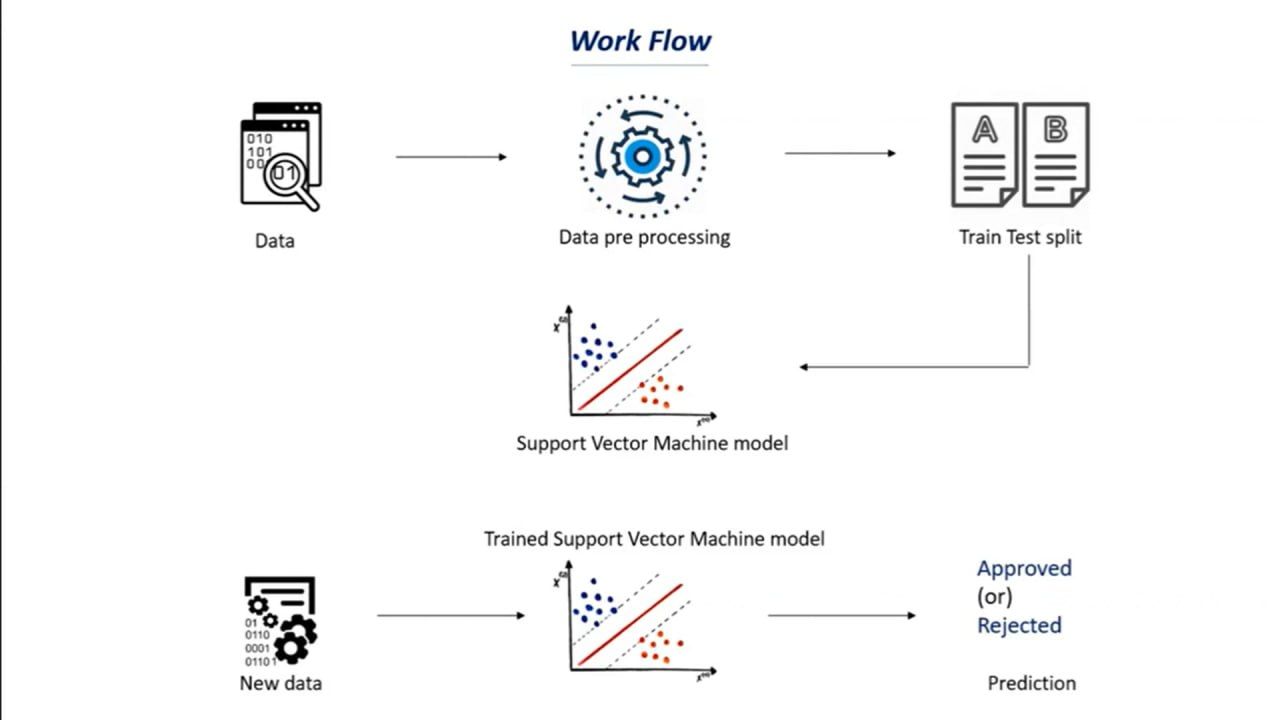

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
loan_dataset = pd.read_csv('loan_data.csv')

In [ ]:
# Initial 5 Rows of the Dataset published
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# Getting more info about the dataset!
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
loan_dataset.isnull().sum()
# Info about where null amounts have

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
#Now, we have to clean data from null amounts:
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


We can see that the dataset has not null amounts now.



---



In [ ]:
# Label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

# We changed the column amounts("Loan Status"  No-0, Yes-1)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [ ]:
# "Dependents" column amount counts:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [ ]:
# So, we can see there are 24 amounts for "3+", we can change it "4" :
loan_dataset  = loan_dataset.replace(to_replace='3+', value=4)


In [ ]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


<ipython-input-19-8a9d45d9f69f>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset, color='purple')


<Axes: xlabel='Education', ylabel='count'>

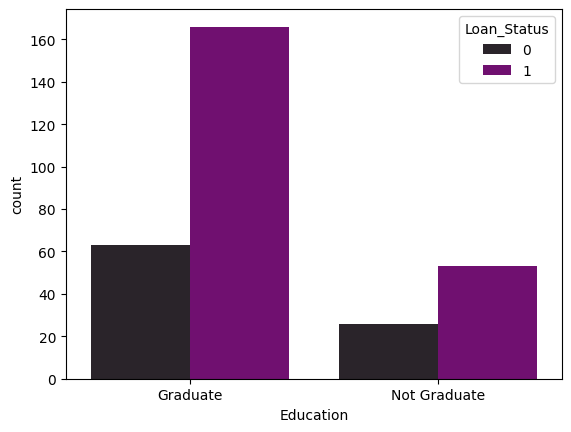

In [ ]:
# Education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset, color='purple')

<ipython-input-23-3225b6a26b15>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset, color='yellow')


<Axes: xlabel='Married', ylabel='count'>

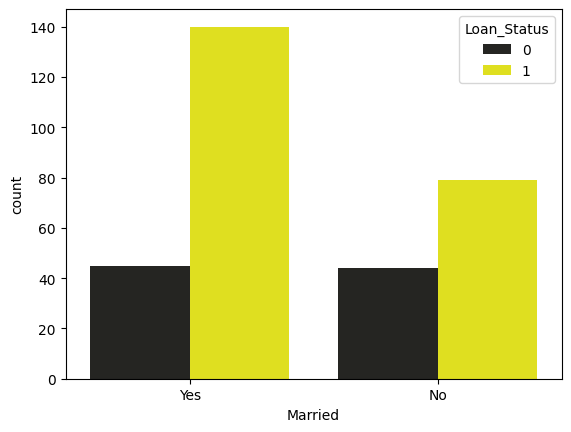

In [ ]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset, color='yellow')

**SUMMARY**

"Married" and "Graduate" people's loan status are higher than those not features

In [30]:
#So, now Dataset Preparation:
# We should change Dataset's column amounts to only numerical version!
# Gender / Married / Education / Self_Employed / Property_Area

loan_dataset.replace( {"Gender":{'Male':1, 'Female':0}, "Married":{'Yes':1, 'No':0}, "Education":{'Graduate':1, 'Not Graduate':0}, "Self_Employed":{'Yes':1, 'No':0}, "Property_Area":{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)


In [31]:
#Labelling the dataset's essential column.

X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [32]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          4          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          4          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [35]:
#Spliting data TEST and TRAIN
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (277, 11) (31, 11)




---



# Training the Model

SUPPORT VECTOR MACHINE LEARNING

In [37]:
classifier = svm.SVC(kernel = 'linear')

In [38]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')